# 5.2 Arrays in Python Programs

## 5.2.2 Basics of Numerical Python Arrays

In [1]:
import numpy as np

In [2]:
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
np.zeros(4)

array([ 0.,  0.,  0.,  0.])

In [4]:
np.zeros_like(["eins", "zwei", "drei"])

array(['', '', ''],
      dtype='<U4')

In [5]:
np.linspace(1, 5, 7)

array([ 1.        ,  1.66666667,  2.33333333,  3.        ,  3.66666667,
        4.33333333,  5.        ])

In [6]:
# important note!
# a slice is not a copy of the original array! (unlike with lists)
a1 = [1, 2, 3]
b1 = a1[1:]
b1[0] *= 5
print(a1)
a2 = np.array([1, 2, 3])
b2 = a2[1:]
b2[0] *= 5
print(list(a2))
# it's only a slice if the result is a sub-list or array (not just a value like a[2])
a1 = [1, 2, 3]
b1 = a1[1]
b1 *= 5
print(a1)
a2 = np.array([1, 2, 3])
b2 = a2[1]
b2 *= 5
print(list(a2))

[1, 2, 3]
[1, 10, 3]
[1, 2, 3]
[1, 2, 3]


## 5.2.3 Computing Coordinates and Function Values

In [7]:
x = np.linspace(0, 1, 5)
y = np.zeros(5)

def f(x):
    return x**3

for i, xi in enumerate(x):
    y[i] = f(xi)

y

array([ 0.      ,  0.015625,  0.125   ,  0.421875,  1.      ])

## 5.2.4 Vectorization

In [8]:
y2 = f(x)
y2

array([ 0.      ,  0.015625,  0.125   ,  0.421875,  1.      ])

In [9]:
x = np.linspace(0, 20)

In [10]:
%%timeit
# scalar:
from math import sin, cos, exp
r = np.zeros(len(x))
for i, xi in enumerate(x):
    r[i] = sin(np.pi * xi)*cos(xi)*exp(-xi**2) + 2 + xi**2

126 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
# vectorized:
from numpy import sin, cos, exp, pi
r = sin(pi * x)*cos(x)*exp(-x**2) + 2 + x**2

20.4 µs ± 558 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 5.3 Curve Plotting

## 5.3.1 MATLAB-Style Plotting with Matplotlib

In [12]:
from numpy import *
from matplotlib.pyplot import *

t = linspace(0, 3)

def f1(t):
    return t**2 * exp(-t ** 2)

y = f1(t)

plot(t, y)
savefig("plot1.png")    # apparently has to be called before show (or before the end of the plotting cell!)

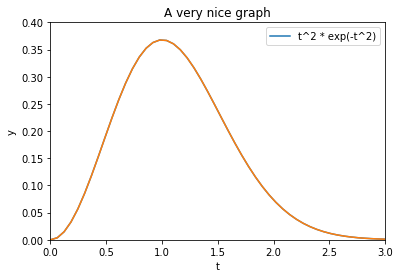

In [13]:
plot(t, y)
xlabel("t")
ylabel("y")
legend(["t^2 * exp(-t^2)"])
axis([0, 3, 0, 0.4])
title("A very nice graph")
# savefig here (a bit like show())
show()

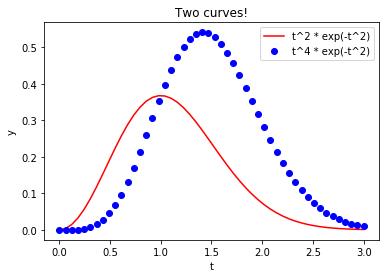

In [14]:
def f2(t):
    return t**2 * f1(t)

y2 = f2(t)

plot(t, y, 'r-')
plot(t, y2, 'bo')
title("Two curves!")
xlabel("t")
ylabel("y")
legend(["t^2 * exp(-t^2)", "t^4 * exp(-t^2)"])
show()

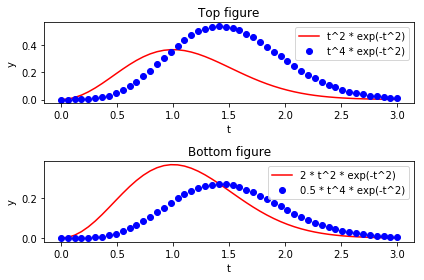

In [15]:
fig = figure()

subplot(2, 1, 1)
plot(t, y, 'r-', t, y2, 'bo')
title("Top figure")
xlabel("t")
ylabel("y")
legend(["t^2 * exp(-t^2)", "t^4 * exp(-t^2)"])

subplot(2, 1, 2)
plot(t, 1 * y, 'r-', t, .5 * y2, 'bo')
title("Bottom figure")
xlabel("t")
ylabel("y")
legend(["2 * t^2 * exp(-t^2)", "0.5 * t^4 * exp(-t^2)"])

fig.tight_layout()    # makes that the title of the bottom thing fits as well
show()

## 5.3.4 Making Animations

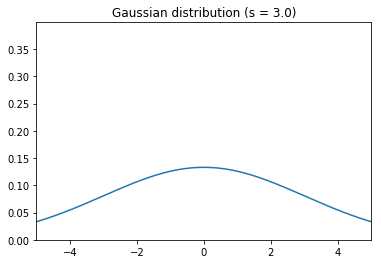

In [16]:
from numpy import pi, sqrt, exp, linspace
import matplotlib.pyplot as plt
from IPython import display
import time

def f(x, m, s):
    return 1 / sqrt(2 * pi) / s * exp(-1/2 * ((x - m) / s)**2)

x = linspace(-5, 5, 300)
s = linspace(1, 3)

plt.figure()

for i, s in enumerate(s):
    display.clear_output(wait=True)
    plt.plot(x, f(x, 0, s))
    plt.title(f"Gaussian distribution (s = {s})")
    plt.axis([-5, 5, 0, f(0, 0, 1)])
    plt.savefig("./stuff/footage/pic%04d.png" % i)
    plt.show()
    time.sleep(1e-3)

In [17]:
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

x = linspace(-5, 5, 300)
s = linspace(1, 3)

fig = plt.figure()
ln, = plt.plot([], [])
plt.xlabel("x")
plt.ylabel("y")
plt.axis([-5, 5, 0, f(0, 0.5, 1)])

def draw(s):
    plt.title(f"Gaussian distribution (s = {s})")
    y = f(x, 0.5, s)
    ln.set_data(x, y)
    return ln,

anim = FuncAnimation(fig, draw, s, interval=50, blit=True)
mpl.rc('animation', html='html5')

anim

In [18]:
anim.save("movie.mp4", fps=15)

# 5.4 Plotting Difficulties

## 5.4.1 Piecewisely Defined Functions

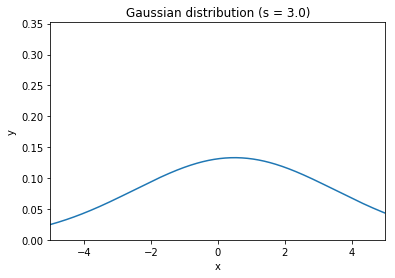

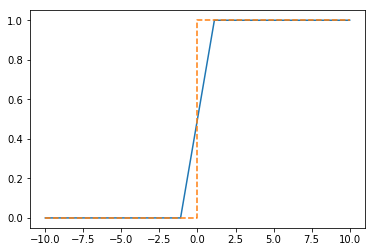

In [19]:
x = linspace(-10, 10, 10)
H = lambda x: x > 0
y = H(x)
plt.figure()
plt.plot(x, y, '', [min(x), 0, 0, max(x)], [0, 0, 1, 1], '--')
plt.show()

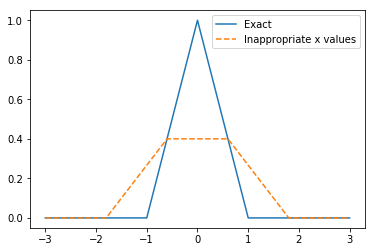

In [20]:
# Hat Function
N = lambda x: ((-1 <= x) & (x < 0)) * (x + 1) + ((0 <= x) & (x < 1)) * (1 - x)
x1 = np.array([-3, -1, 0, 1, 3])
x2 = linspace(-3, 3, 6)
plt.plot(x1, N(x1), '', x2, N(x2), '--')
plt.legend(("Exact", "Inappropriate x values"))
plt.show()

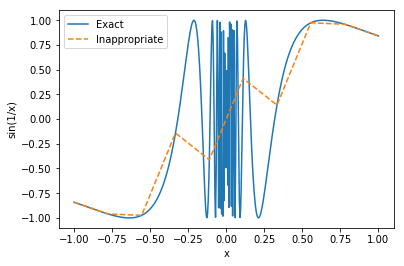

In [21]:
# Hat Function
from numpy import sin
f = lambda x: sin(1/x)
x1 = linspace(-1, 1, 500)
x2 = linspace(-1, 1, 10)
plt.plot(x1, f(x1), '', x2, f(x2), '--')
plt.xlabel("x")
plt.ylabel("sin(1/x)")
plt.legend(("Exact", "Inappropriate"))
plt.show()

# 5.5 More Advanced Vectorization of Functions

## 5.5.2 Vectorization of the Heaviside Function

In [23]:
# Non-vectorized
def H1(x):
    return 0 if x < 0 else 1

# Loop
def H2(x):
    return np.array([H1(x) for x in x])

# Automatic Vectorization
H3 = np.vectorize(H1)

# Lucky if alright
def H4(x):
    return x >= 0

# Manual Vectorization
def H5(x):
    return np.where(x >= 0, 1, 0)

# Boolean Indexing
def H6(x):
    r = np.zeros(len(x))
    r[x >= 0] = 1
    return r

In [24]:
H1(3)

1

In [25]:
%%timeit
H2(np.array([-1, 0, 1]))

8.31 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%%timeit
H3(np.array([-1, 0, 1]))

37.3 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [27]:
%%timeit
h4 = H4(np.array([-1, 0, 1]))

4.75 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
H4(np.array([-1, 0, 1]))*1

array([0, 1, 1])

In [29]:
%%timeit
H5(np.array([-1, 0, 1]))

9.18 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
H5(3)

array(1)

In [31]:
%%timeit
H6(np.array([-1, 0, 1]))

9.81 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
# Times may vary for other functions!

# 5.6 More on Numerical Python Arrays

In [33]:
# compact linspace(-5, 5, 11)
r_[-5:5:11j]

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

# 5.9 Some Common Linear Algebra Operations

In [34]:
A = np.array(range(25)).reshape(5, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [35]:
(np.dot(A, A) == A@A).all()

True

In [36]:
A[[1, 3], [1, 3]]

array([ 6, 18])

In [37]:
A[[1, 3], :][:, [1, 3]]

array([[ 6,  8],
       [16, 18]])

In [38]:
A[np.ix_([1, 3], [1, 3])]

array([[ 6,  8],
       [16, 18]])

# 5.13 Summary

## 5.13.2 Example: Animating a Function

In [39]:
import matplotlib.pyplot as plt
from numpy import *

In [40]:
def animate(tmax, dt, x, function, ymin, ymax, t0=0, xlabel="x", ylabel="y", filename="tmp_"):
    t = t0
    counter = 0
    while t <= tmax:
        y = function(x, t)
        plt.clf()
        plt.plot(x, y)
        plt.axis([x[0], x[-1], ymin, ymax])
        plt.title("time=%2d h" % (t / 3600))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig("tmp_%04d.png" % counter)
        t += dt
        counter += 1

In [41]:
def T(z, t):
    a = sqrt(omega / 2 / k)
    return T0 + A*exp(-a * z)*cos(omega*t - a*z)

In [42]:
k = 1e-6
P = 24*60*60
omega = 2*pi / P
dt = P/24
tmax = 3*P
T0 = 10
A = 10
a = sqrt(omega / 2 / k)
D = -(1/a) * log(0.001)
n = 501

z = linspace(0, D, n)
animate(tmax, dt, z, T, T0-A, T0+A, 0, "z", "T")

In [44]:
import os
os.system("convert -delay 20 tmp_*.png movie.gif")
os.system("rm -f tmp_*.png")

0